# Give me credit Churn Prediction

#### Importing necessary Libraries

In [2]:
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

#### Loading data to Pandas Data Frame

In [3]:
df_train = pd.read_csv('/Users/alvinsantoso/Downloads/VS_Code/personal_project/givemecredit/cs-training.csv')
df_test = pd.read_csv('/Users/alvinsantoso/Downloads/VS_Code/personal_project/givemecredit/cs-test.csv')

In [4]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### EDA

In [5]:
df_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

It seems like all of the features are numeric so there are no need for encoding necessary.

Below shows the missing null values in MonthlyIncome and NumberOfDependents which we can deal using imputation

In [7]:
df_train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Lets look at the count distribution for the target column

In [8]:
def percentage(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

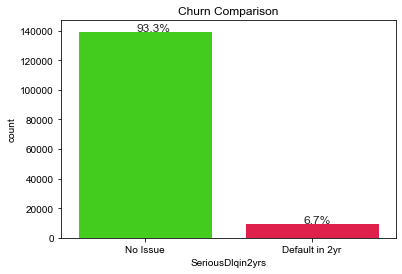

In [9]:
plt.title('Churn Comparison')
sns.set(style="darkgrid")
ax = sns.countplot(x='SeriousDlqin2yrs',data=df_train,palette='prism')
ax.set_xticklabels(['No Issue','Default in 2yr'])
percentage(ax, df_train.SeriousDlqin2yrs)

There seems to be imbalanced class distribution as the number of observations for customer who have flagged to be default in 2 years is significantly lower (6.7%)

Let's look at correlation heatmaps between features

<AxesSubplot:>

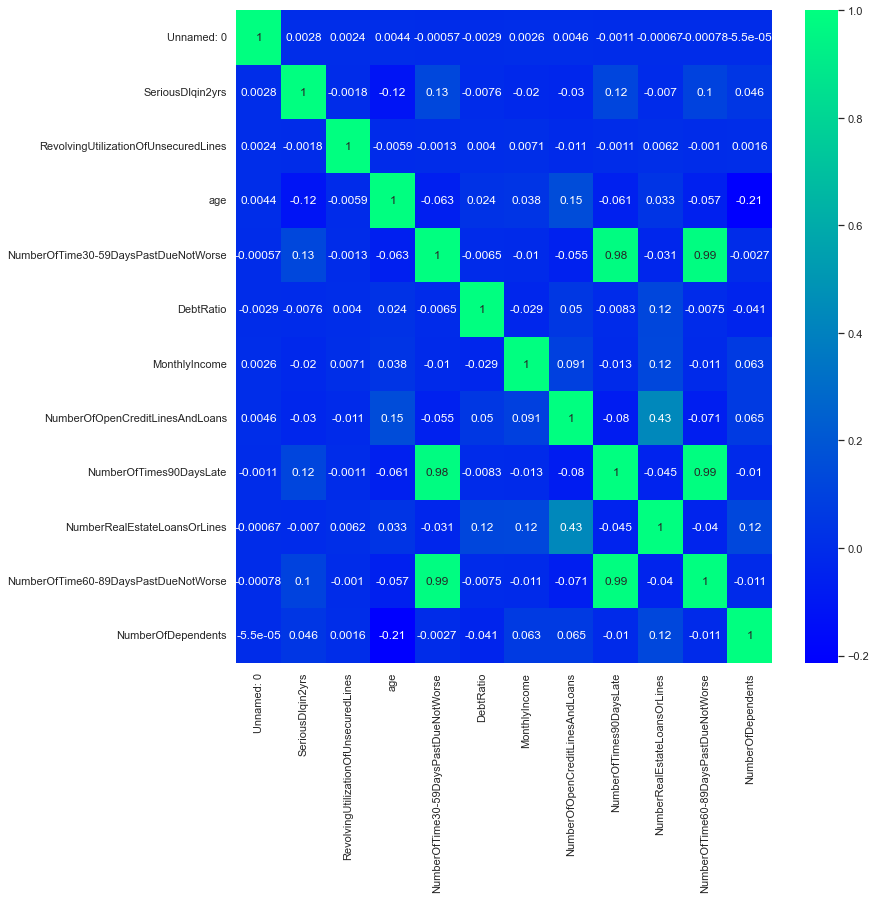

In [10]:
corr = df_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='winter',annot=True)

There are strong correlations for these features (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate). Let's build a scatter plot to see if there is an interesting pattern between the 3 features and Target feature, as well as the remaining of the features to see the distribution plot of its values

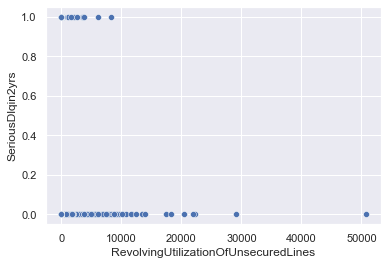

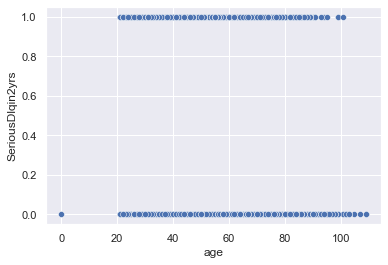

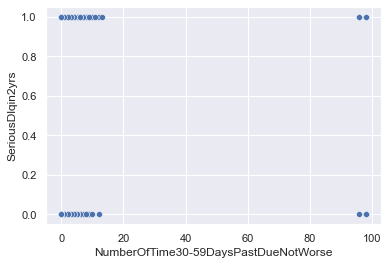

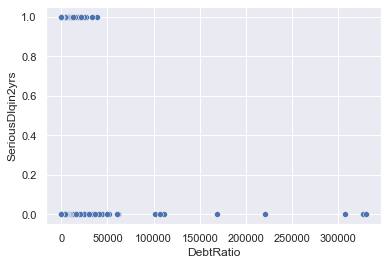

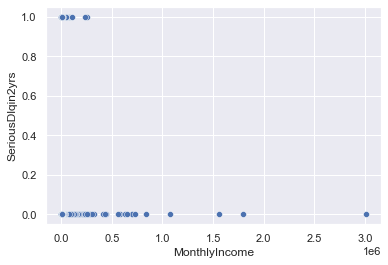

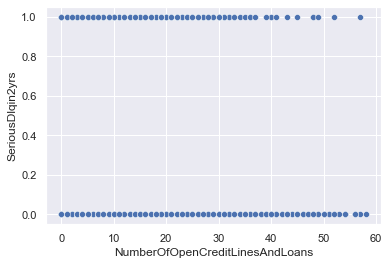

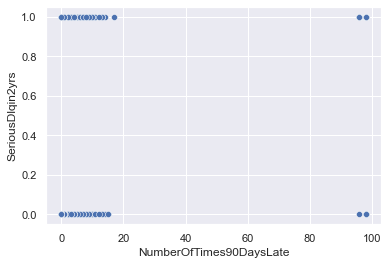

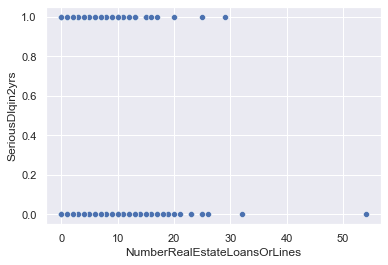

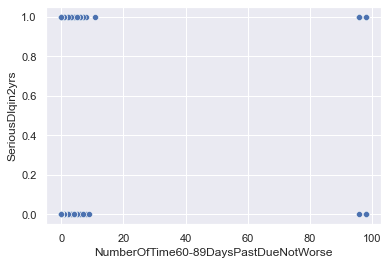

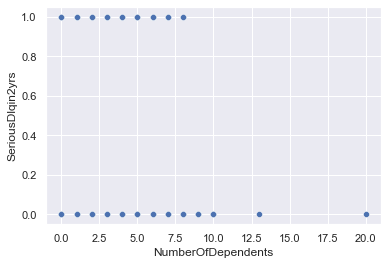

In [11]:
for i, feature in enumerate(df_train.columns[2:]):
    sns.scatterplot(data =df_train , x = df_train[feature], y = 'SeriousDlqin2yrs')
    plt.show()

In [12]:
# (df_train["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index())
# (df_train["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index())
# (df_train["NumberOfTimes90DaysLate"].value_counts().sort_index())

Looking at the trend above for the 3 features there is apparent case of an outliers (value > 96), as well as RevolvingUtilizationOfUnsecuredLines (value of 50708) so we might want to remove those values from the dataset.

Most of the values also showing skewed distribution except NumberOfOpenCreditLinesAndLoans so we might want to apply K-Means clustering to divide the data into groups

Now let's look at the missing values in MonthlyIncome and NumberOfDependents

In [13]:
print(df_train.MonthlyIncome.describe().apply("{0:.5f}".format))
print(df_train.NumberOfDependents.describe().apply("{0:.5f}".format))

count     120269.00000
mean        6670.22124
std        14384.67422
min            0.00000
25%         3400.00000
50%         5400.00000
75%         8249.00000
max      3008750.00000
Name: MonthlyIncome, dtype: object
count    146076.00000
mean          0.75722
std           1.11509
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          20.00000
Name: NumberOfDependents, dtype: object


Looking at the stats above we also need to do some data cleaning especially for data where monthly income = 0

### Data Cleaning & Imputation  

In [14]:
# Rename column
df_train.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse': 'NumberOfTime30_59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse': 'NumberOfTime60_89DaysPastDueNotWorse'}, inplace=True)

In [15]:
# Imputation for missing values
imp_monthlyincome = SimpleImputer(missing_values=np.nan, strategy='median')
imp_nodependants = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_train[['MonthlyIncome']] = imp_monthlyincome.fit_transform(df_train[['MonthlyIncome']])
df_train[['NumberOfDependents']] = imp_nodependants.fit_transform(df_train[['NumberOfDependents']])

In [16]:
# There are no missing values now in the dataset
df_train.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30_59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60_89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [17]:
# Remove outliers 
df_train = df_train.loc[(df_train["NumberOfTime30_59DaysPastDueNotWorse"] < 20) & (df_train["NumberOfTime60_89DaysPastDueNotWorse"] < 20) & (df_train["NumberOfTimes90DaysLate"] < 20) 
& (df_train["RevolvingUtilizationOfUnsecuredLines"] < 50000)]
df_train.shape

(149730, 12)

### K-Means Clustering for normally distributed feature

In [18]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

/var/folders/7q/qq0pyjf91jqc2d43whqzvfk80000gn/T/ipykernel_11449/2543350778.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7q/qq0pyjf91jqc2d43whqzvfk80000gn/T/ipykernel_11449/2543350778.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7q/qq0pyjf91jqc2d43whqzvfk80000gn/T/ipykernel_11449/2543350778.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

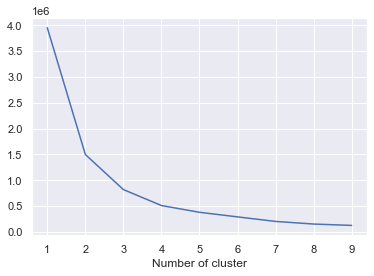

In [19]:
# Elbow method to find the optimal cluster number
sse={}
df_cluster = df_train[['NumberOfOpenCreditLinesAndLoans']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_train[['NumberOfOpenCreditLinesAndLoans']])
df_train['NumberOfOpenCreditLinesAndLoansCluster'] = kmeans.predict(df_train[['NumberOfOpenCreditLinesAndLoans']])
df_train = order_cluster('NumberOfOpenCreditLinesAndLoansCluster', 'NumberOfOpenCreditLinesAndLoans',df_train,True)
df_train.groupby('NumberOfOpenCreditLinesAndLoansCluster').NumberOfOpenCreditLinesAndLoans.describe()

,count,mean,std,min,25%,50%,75%,max
NumberOfOpenCreditLinesAndLoansCluster,,,,,,,,
0,73179.0,4.515298,1.916332,0.0,3.0,5.0,6.0,7.0
1,59080.0,10.356077,1.904080,8.0,9.0,10.0,12.0,14.0
2,17471.0,18.639059,4.203018,15.0,16.0,17.0,20.0,58.0


In [21]:
# Drop the first column
df_train = df_train.drop(columns = ['Unnamed: 0'])

### Logistic Regression Multivariate

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
 

glm_model = smf.glm(formula='SeriousDlqin2yrs ~ RevolvingUtilizationOfUnsecuredLines + age + NumberOfTime30_59DaysPastDueNotWorse + DebtRatio + MonthlyIncome + NumberOfOpenCreditLinesAndLoans + NumberOfTimes90DaysLate + NumberRealEstateLoansOrLines + NumberOfTime60_89DaysPastDueNotWorse + NumberOfDependents + NumberOfOpenCreditLinesAndLoansCluster',
data=df_train, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               149730
Model:                            GLM   Df Residuals:                   149718
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29585.
Date:                Wed, 15 Dec 2021   Deviance:                       59169.
Time:                        22:54:30   Pearson chi2:                 3.98e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Interpreting the results above using the glm regression classifier we can look at the coeficient and pvalue columns for example for feature NumberOfTimes90DaysLate has a coef of 0.8589. Meaning that a change in one unit (in this example occasion of late occurence) of the feature, it will increase the likelihood of customer becoming default in 2 years by about 0.8589. and because its pvalue is less then 0.05, meaning we can reject the null hypothesis (NumberOfTimes90DaysLate is statistically significant feature)

### Train Test Split for Feature and Target Column

In [23]:
X = df_train.drop(columns = ['SeriousDlqin2yrs'])
y = df_train['SeriousDlqin2yrs']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import sklearn.metrics as metrics

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# fit logistic regression model
model = LogisticRegression(max_iter=300, solver= 'lbfgs')
model.fit(X_train, y_train)

# Precision and recall
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     41900
           1       0.59      0.15      0.24      3019

    accuracy                           0.94     44919
   macro avg       0.77      0.57      0.60     44919
weighted avg       0.92      0.94      0.92     44919

Accuracy: 0.9360404283265433


Eventhough accuracy is high, the dataset is predicting the majority of the class where customer would not goes into default, causing a huge bias on the model learning and evaluation. 

Hence the low recall (15%) and f1 score. In fact this is due to imbalanced dataset as the model has to deal with 94% dataset being classified as No Trouble (goes onto default).

On the below comparison using XGBoost classifier, we will use one of its feature to scale the imbalanced dataset.

#### ROC AUC Curves for Logistic Regression model

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.817


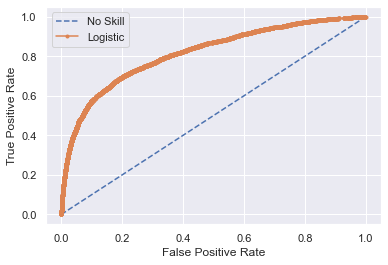

In [25]:
#Plotting ROC AUC curve to show the false positive rate (x) vs true positive rate (y)
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Based on the evaluation above on running the logistic regression classifier on the dataset, the roc auc returns a score of 81.6. There could be further work can be done on investigating imbalanced dataset, which seems to be common on the machine learning problem such as fraud detection using techniques such as random unversampling and oversampling. Reference below

http://xgboost.readthedocs.io/en/latest/parameter.html

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

https://machinelearningmastery.com/imbalanced-classification-with-python-7-day-mini-course/

### XGBoost

Parameter Tunning

Let's try different classifer for comparison on which classifier works better to show like for like comparison starting with Hyper Parameter Tunning using randomized search of the XGBoost classifier adding scale pos weight parameter due to imbalanced data set ratio

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
import xgboost as xgb

xgbmodel = xgb.XGBClassifier(n_jobs = -1)

xgb_hyperparams = {
    'clf__max_depth' : np.arange(4,5,1),
    'clf__learning_rate': [0.001, 0.01, 0.1],
    'clf__n_estimators' : np.arange(400,800,100),
    'clf__subsample': np.arange(0.1,0.5,0.8),
    'clf__scale_pos_weight': [10,15,20] 
    
}

clf = RandomizedSearchCV(estimator=xgbmodel,
                         param_distributions=xgb_hyperparams,
                         scoring='roc_auc',
                         n_iter=20,
                         verbose=2)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)

In [69]:
#XGB Model using hyperparameters tuning result 
xgb_model = xgb.XGBClassifier(max_depth=4,
                                   learning_rate=0.01,
                                   n_estimators=700,
                                   subsample=0.1,
                                   scale_pos_weight=20,
                                   n_jobs = -1).fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:18:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB classifier on training set: 0.74


In [70]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84     41900
           1       0.18      0.82      0.30      3019

    accuracy                           0.74     44919
   macro avg       0.58      0.78      0.57     44919
weighted avg       0.93      0.74      0.80     44919



Using XGBoost classifier, we can see an improvement on the precision, recall and f1-score as well as the AUC score below of 86.4. Recall score has also doing a good job at predicting on 82% rate (True Positive rate), and looking at the importance of the business case and the problem we are trying to solve, we should looking at Recall as the more important metrics (emphasize on False Negative cost). 82% Recall rate means there are 18% observation from the xgboost model that predicts a customer not goes into default (False Negative) which actually these customers were default customer (True Positive).

Comparing the xgboost model with logistic regression previously used on the original imbalanced dataset whereby it only able to achieve 16% Recall score, meaning there are 84% observation that predicts customer not goes into default (False Negative) which in fact they are a troubled customer!

The scores should be able to improved by further experementing on more sophisticated detection on outliers, adding more dataset if it's available and further hyperparameters tuning.

Another important notes would be why choosing Recall as the most important metric to figure out which model works best. As a rule of thumb, when the business case place important on a False Negative cost, the Recall should be used. If the business case place important on a False Positive cost, then Precision should be used.

Example of high False Negative cost business case
Detecting Fraud customer (True positive) and Non Fraud (False Negative). If False Negative is high, the financial institution will face a huge issue.

Example of high False Positive cost business case
Non Spam Email detection (True Negative) being detected as Spam (False Positive). the consequences would be customer might miss important email communication.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.864


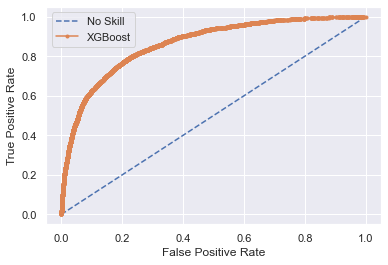

In [71]:
# XGBoost Classifier ROC AUC

ns_probs_res = [0 for _ in range(len(y_test))]
xgb_probs = xgb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs_res)
xgb_auc = roc_auc_score(y_test, xgb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs_res)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Feature Importance

Text(0.5, 0, 'XGBoost Feature Importance')

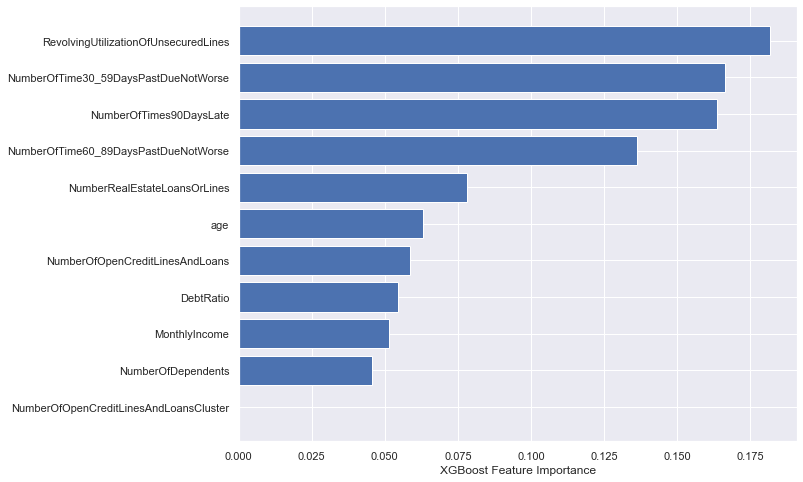

In [72]:
#Model Explainability
sorted_idx = xgb_model.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(X.columns[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

We can see that the model emphasize feature importance to RevolvingUtilizationOfUnsecuredLines as well as number of times 30-59 and more than 90 days late payment as the most important and useful features, which normally speaking would make sense. 

The more credit cards and loan customer has and what percentage it counted from the sum of the credit limit, as well as repeating offences and occurences of a late payment, then the more likely a customer would be in financial issue the near future.

The more real estate loans also would be naturally a significant feature to determine whether customer might facing financial difficulty.

### Test Data Probability Scoring

In [80]:
# Imputation for missing values on test data
imp_monthlyincome_test = SimpleImputer(missing_values=np.nan, strategy='median')
imp_nodependants_test = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_test[['MonthlyIncome']] = imp_monthlyincome_test.fit_transform(df_test[['MonthlyIncome']])
df_test[['NumberOfDependents']] = imp_monthlyincome.fit_transform(df_test[['NumberOfDependents']])

In [81]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_test[['NumberOfOpenCreditLinesAndLoans']])
df_test['NumberOfOpenCreditLinesAndLoansCluster'] = kmeans.predict(df_test[['NumberOfOpenCreditLinesAndLoans']])
df_test = order_cluster('NumberOfOpenCreditLinesAndLoansCluster', 'NumberOfOpenCreditLinesAndLoans',df_test,True)
df_test.groupby('NumberOfOpenCreditLinesAndLoansCluster').NumberOfOpenCreditLinesAndLoans.describe()

,count,mean,std,min,25%,50%,75%,max
NumberOfOpenCreditLinesAndLoansCluster,,,,,,,,
0,49753.0,4.507748,1.934359,0.0,3.0,5.0,6.0,7.0
1,39965.0,10.357213,1.899094,8.0,9.0,10.0,12.0,14.0
2,11785.0,18.655664,4.217028,15.0,16.0,17.0,20.0,85.0


In [82]:
#XGBoost model classifier probability scoring
df_test_pred = df_test.drop(columns = ['Unnamed: 0','SeriousDlqin2yrs'])
y_rest_pred = xgb_model.predict_proba(df_test_pred)[:, 1]
df_test_pred["Proba"]= y_rest_pred

# df_test.info()

In [87]:
df_test_pred[["Proba"]].head()

,Proba
0,0.406292
1,0.640051
2,0.413309
3,0.425035
4,0.387743


In [84]:
df_test_pred.to_csv("test_probability.csv", index=False, sep=',', encoding='utf-8')

### Confusion Matrix

Additional visualisation to describe the performance of the choosen classifier.

the confusion matrix will give a representation of the below

TP (True Positive, predicted Y and actual Y) rate = 0.82 (also known as Recall)

FP (False Positive, predicted Y and actual N) rate = 0.27

TN (True Negative, predicted N and actual N) rate = 0.73

FN (False Negative, predicted N and actual Y) rate = 0.18

And as we want to minimise the cost of FN as per the business case issue, we can be satisfied with low FN cost.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



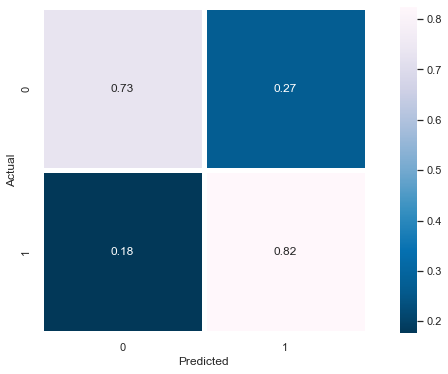

In [74]:
cm = xgb_model.predict(X_test)
    
cf = confusion_matrix(y_test, cm, normalize='true')
plt.figure(figsize=(12, 6))
sns.heatmap(cf, annot=True, fmt=".2f", lineWidths=5, square=True, cmap="PuBu_r")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()